<u><b>Deep Learning : Principles and Practices - CSE1016 - L33 + L34</b></u>

<u><b>Name: </b></u> Gaurav Pendharkar

<u><b>Registration No: </b></u> 20BAI1153

<u><b>Lab - 5 : </b></u> CNN Implementation using Keras on MNIST dataset

# Importing the required modules

In [124]:
# Modules used for data handling.
import pandas as pd
import numpy as np
from keras.utils import np_utils 

# Module used for random choice from an iterable.
import random as r

# Modules used for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Module used for loading MNIST dataset
from tensorflow.keras.datasets import mnist

# Module used for building the CNN.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

# Module used for early stopping callback
import tensorflow as tf

# Module used for suppressing warning
import warnings 
warnings.filterwarnings('ignore')

In [9]:
# Centering all the output images in the notebook.
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Loading the dataset

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Sample Images from the dataset

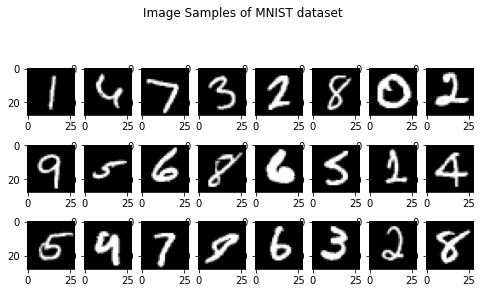

In [8]:
rows = 3
columns = 8
fig, axs = plt.subplots(rows, columns,figsize=(8,8))
for i in range(rows):
    for j in range(columns):
        axs[i,j].imshow(r.choice(x_train),cmap='gray')
fig.suptitle("Image Samples of MNIST dataset")
plt.subplots_adjust(bottom=0.5, top=0.9, hspace=0)
plt.show()

# Class Distribution

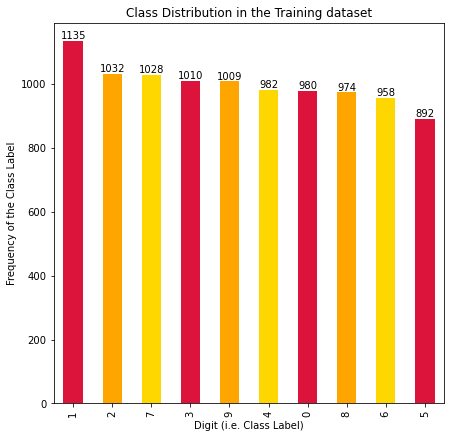

In [5]:
plt.figure(figsize=(7,7))
ax = pd.Series(y_test).value_counts().plot(kind="bar",
                                      color=["crimson","orange","gold"])
plt.title("Class Distribution in the Training dataset")
plt.xlabel("Digit (i.e. Class Label)")
plt.ylabel("Frequency of the Class Label")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

There are maximum images of digit 1 which may lead to the model being biased to that class label. However, the other classes are uniformly distributed.

# CNN Implementation

In [130]:
class CNN:
    
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test  = x_test
        self.y_test  = y_test
        self.model = None
        self.history = None
        self.x_train_dim = None
        self.y_train_dim = None
        self.INPUT_SHAPE = (28,28,1)
        self.OUTPUT_SHAPE = 10
    
    def __get_expected_shape(self, data):
        return (data.shape[0], data.shape[1], data.shape[2], 1)
    
    def preprocess_data(self):
        self.x_train_dim = self.__get_expected_shape(self.x_train)
        self.x_test_dim = self.__get_expected_shape(self.x_test)
        self.x_train = self.x_train.reshape(self.x_train_dim)
        self.x_test  = self.x_test.reshape(self.x_test_dim)
        self.y_train = np_utils.to_categorical(self.y_train, 10)
        self.y_test  = np_utils.to_categorical(self.y_test, 10)
    
    def __add_dense_layer(self, units : int, activation : str):
        self.model.add(Dense(units,
                             activation=activation))
        
    def build_model(self):
        self.model=Sequential()
        self.model.add(Conv2D(320,(3,3),
                       activation='relu',
                       input_shape=self.INPUT_SHAPE))
        self.model.add(MaxPool2D(2,2))
        self.model.add(Flatten())
        self.__add_dense_layer(100, "relu")
        self.__add_dense_layer(self.OUTPUT_SHAPE, "softmax")
        self.model.summary()
        self.model.compile(loss='categorical_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])
        
    def fit_model(self):
        self.history = self.model.fit(self.x_train,
                                      self.y_train,
                                      epochs=20,
                                      batch_size=32,
                                      verbose=1, 
                                      validation_data=(self.x_test, self.y_test),
                                      callbacks=[ # this will prevent the model from overfitting
                                      tf.keras.callbacks.EarlyStopping(
                                        monitor='val_loss',
                                        patience=3,
                                        restore_best_weights=True)
                                      ])
    
    def plot_history(self,title):
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title(title)
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    
    def evaluate_model(self):
        print("Test Dataset Loss: ", self.history.history['val_loss'])
        print("Test Dataset Accuracy: ",self.history.history['val_accuracy'])

# CNN Implementation

In [131]:
mnist_cnn = CNN(x_train, y_train, x_test, y_test)

## Preprocessing the data

In [132]:
mnist_cnn.preprocess_data()

## Building the model architecture

In [133]:
mnist_cnn.build_model()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 320)       3200      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 320)      0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 54080)             0         
                                                                 
 dense_32 (Dense)            (None, 100)               5408100   
                                                                 
 dense_33 (Dense)            (None, 10)                1010      
                                                                 
Total params: 5,412,310
Trainable params: 5,412,310
Non-trainable params: 0
___________________________________________

## Fitting the model

In [134]:
mnist_cnn.fit_model()

Epoch 1/20
1875/1875 [==============================] - 169s 90ms/step - loss: 0.7902 - accuracy: 0.9429 - val_loss: 0.1042 - val_accuracy: 0.9693
Epoch 2/20
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0791 - accuracy: 0.9763 - val_loss: 0.1229 - val_accuracy: 0.9651
Epoch 3/20
1875/1875 [==============================] - 168s 89ms/step - loss: 0.0567 - accuracy: 0.9824 - val_loss: 0.1013 - val_accuracy: 0.9739
Epoch 4/20
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0416 - accuracy: 0.9865 - val_loss: 0.0996 - val_accuracy: 0.9759
Epoch 5/20
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.1064 - val_accuracy: 0.9768
Epoch 6/20
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0278 - accuracy: 0.9918 - val_loss: 0.1155 - val_accuracy: 0.9790
Epoch 7/20
1875/1875 [==============================] - 180s 96ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0

## Visualizing the plot history

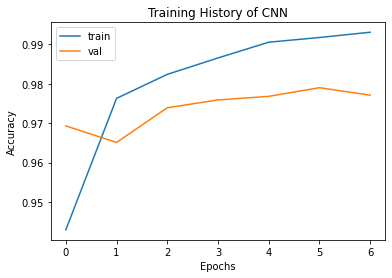

In [135]:
mnist_cnn.plot_history("Training History of CNN")

# Conclusion

- A Convolutional Neural Network is implemented using Keras and TensorFlow Libraries of Python.
- Moreover, the model was expected to be trained for 20 epochs but stopped early at 7 epochs while monitoring the validation loss after each epoch.
- From the plot we can infer that initially the model was giving a higher accuracy on test dataset than train dataset but as and when the epochs proceeded the train accuracy was higher than the test accuracy.
- Finally, the model gives an accuracy of 97.90% on the test dataset and 99.18% on the train dataset.